In [1]:
import cv2
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
from projeto_helper import BeerClassification

PATH = 'C:\\Users\\marco\\Google Drive\\ComputerScience\\Visão Computacional\\images\\Skol'


In [2]:
bc = BeerClassification(PATH, ['0', '1', '2'])
query_img = bc.getImage(bc.imgs[0])
train_img = bc.getImage(bc.imgs[75])
for i, label in enumerate(bc.labels):
    print(i, label)

0 0_v0_0.jpg
1 0_v0_45L.jpg
2 0_v0_45R.jpg
3 0_v10_0.jpg
4 0_v10_45L.jpg
5 0_v10_45R.jpg
6 0_v11_0.jpg
7 0_v11_45L.jpg
8 0_v11_45R.jpg
9 0_v12_0.jpg
10 0_v12_45L.jpg
11 0_v12_45R.jpg
12 0_v13_0.jpg
13 0_v13_45L.jpg
14 0_v13_45R.jpg
15 0_v14_0.jpg
16 0_v14_45L.jpg
17 0_v14_45R.jpg
18 0_v15_0.jpg
19 0_v15_45L.jpg
20 0_v15_45R.jpg
21 0_v16_0.jpg
22 0_v16_45L.jpg
23 0_v16_45R.jpg
24 0_v17_0.jpg
25 0_v17_45L.jpg
26 0_v17_45R.jpg
27 0_v18_0.jpg
28 0_v18_45L.jpg
29 0_v18_45R.jpg
30 0_v19_0.jpg
31 0_v19_45L.jpg
32 0_v19_45R.jpg
33 0_v1_0.jpg
34 0_v1_45L.jpg
35 0_v1_45R.jpg
36 0_v20_0.jpg
37 0_v20_45L.jpg
38 0_v20_45R.jpg
39 0_v21_0.jpg
40 0_v21_45L.jpg
41 0_v21_45R.jpg
42 0_v22_0.jpg
43 0_v22_45L.jpg
44 0_v22_45R.jpg
45 0_v23_0.jpg
46 0_v23_45L.jpg
47 0_v23_45R.jpg
48 0_v24_0.jpg
49 0_v24_45L.jpg
50 0_v24_45R.jpg
51 0_v2_0.jpg
52 0_v2_45L.jpg
53 0_v2_45R.jpg
54 0_v3_0.jpg
55 0_v3_45L.jpg
56 0_v3_45R.jpg
57 0_v4_0.jpg
58 0_v4_45L.jpg
59 0_v4_45R.jpg
60 0_v5_0.jpg
61 0_v5_45L.jpg
62 0_v5_45R.jpg

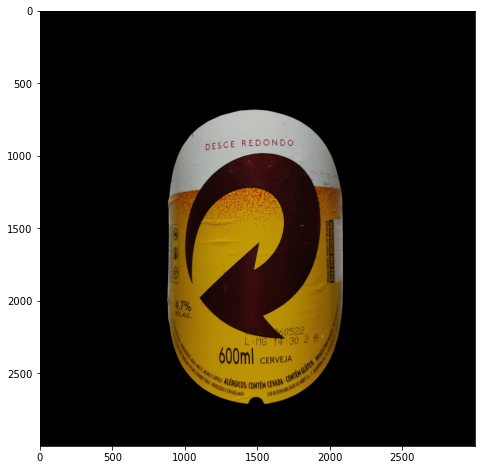

In [3]:
mask = plt.imread(join(PATH, 'mask0.jpg'))
query_img_m = cv2.bitwise_and(query_img, mask)

plt.figure(figsize=(8, 8))
plt.imshow(query_img_m)
plt.show()

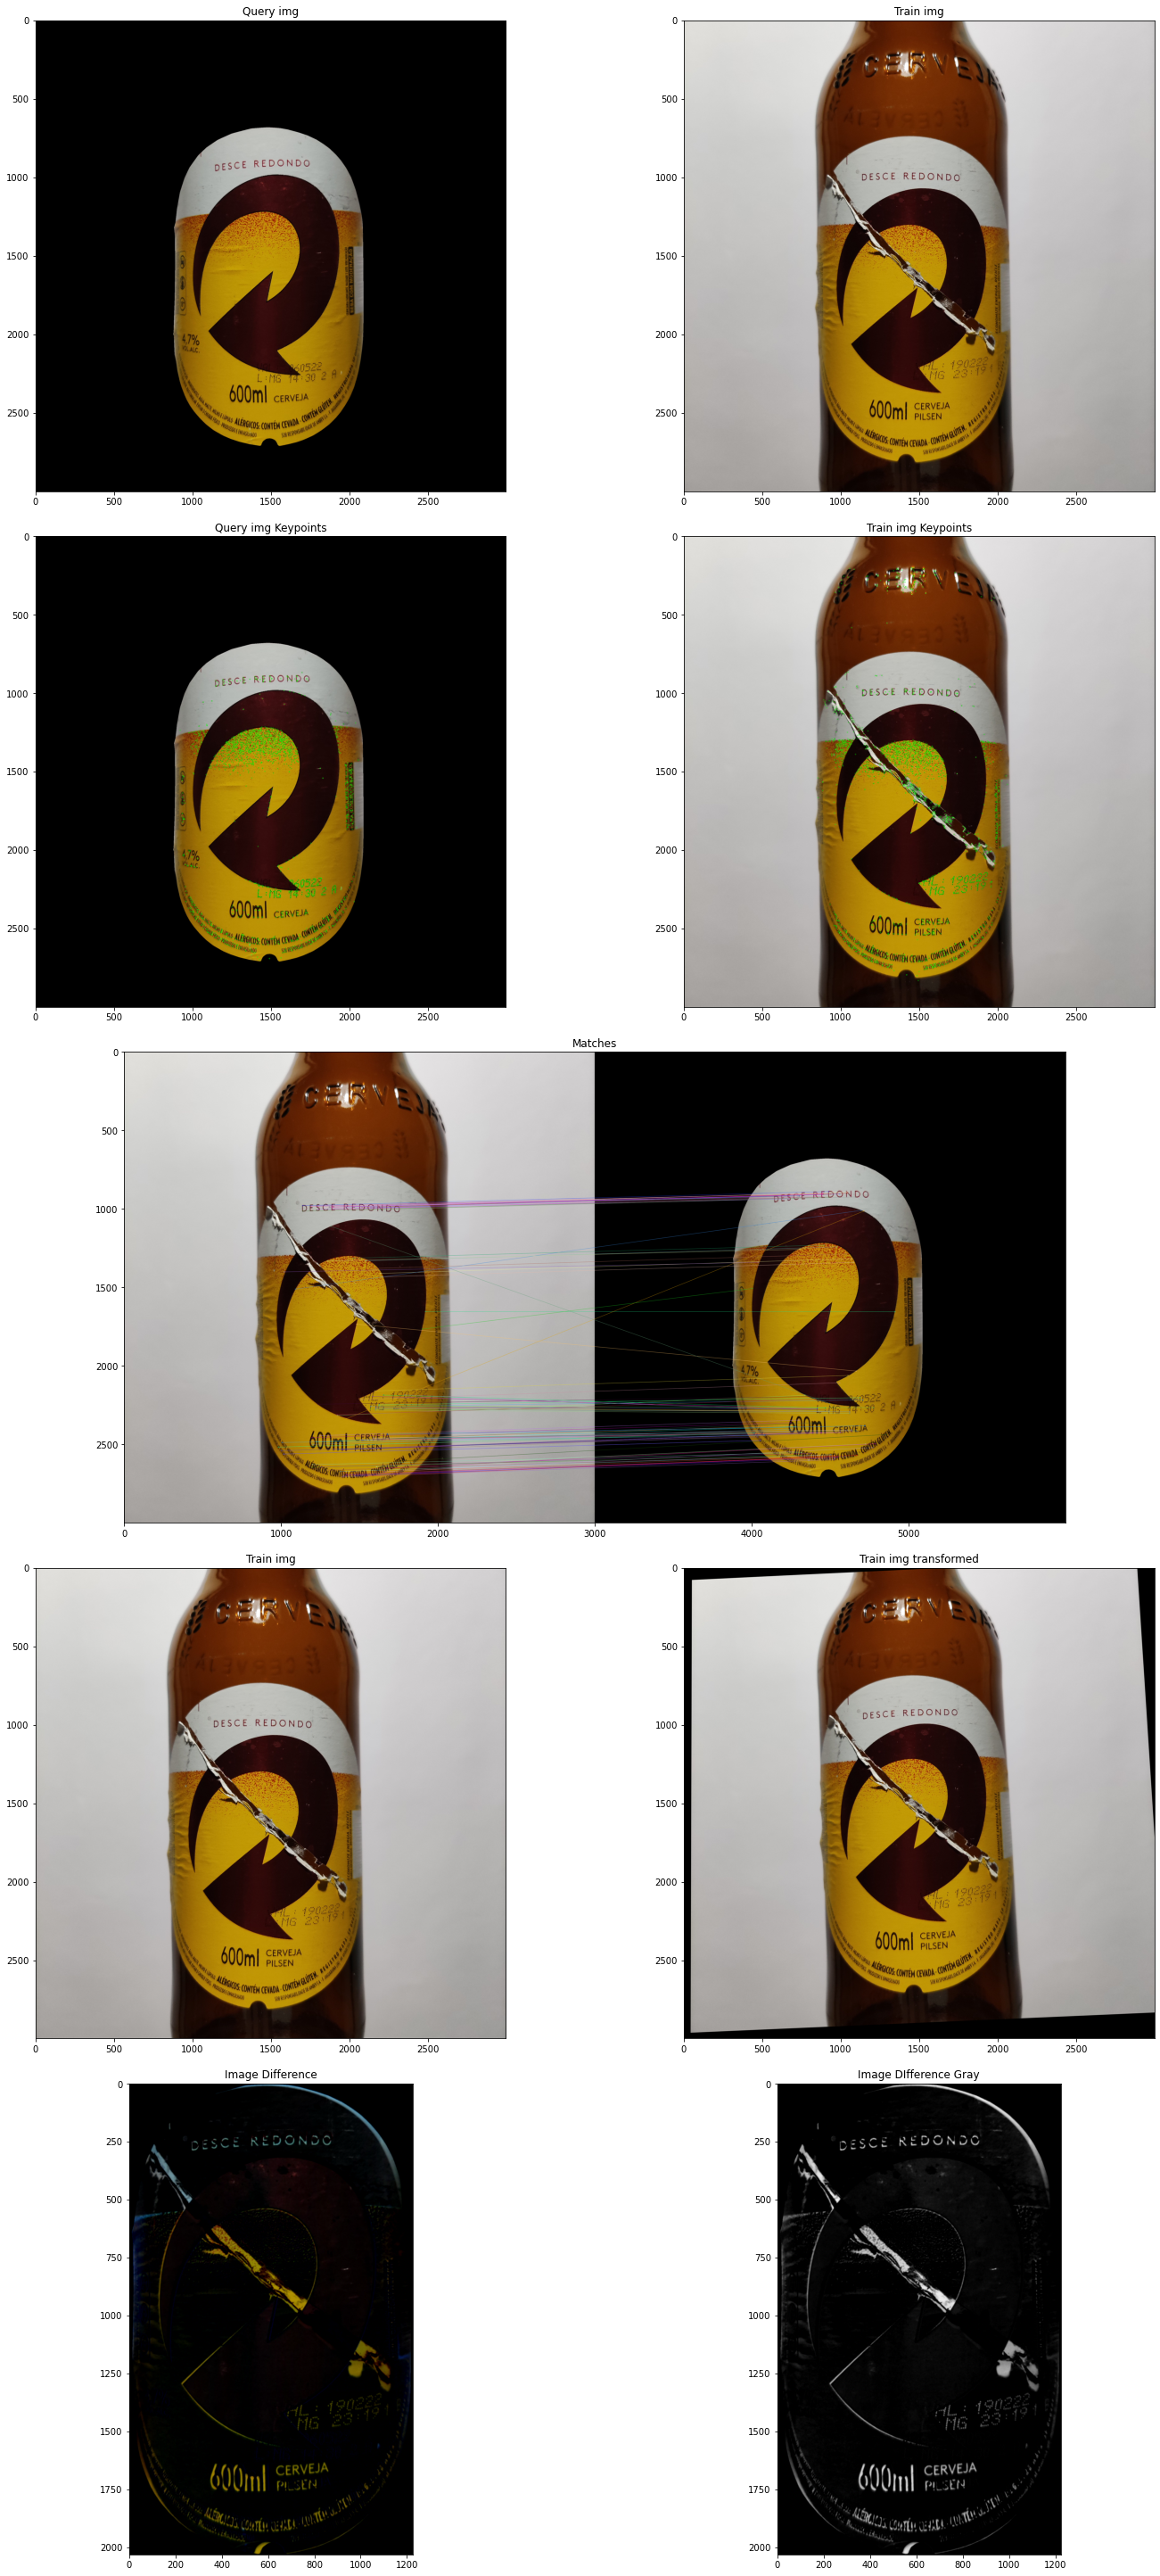

In [4]:
img_diff = bc.processGetDiff(query_img_m, train_img, plot=True)

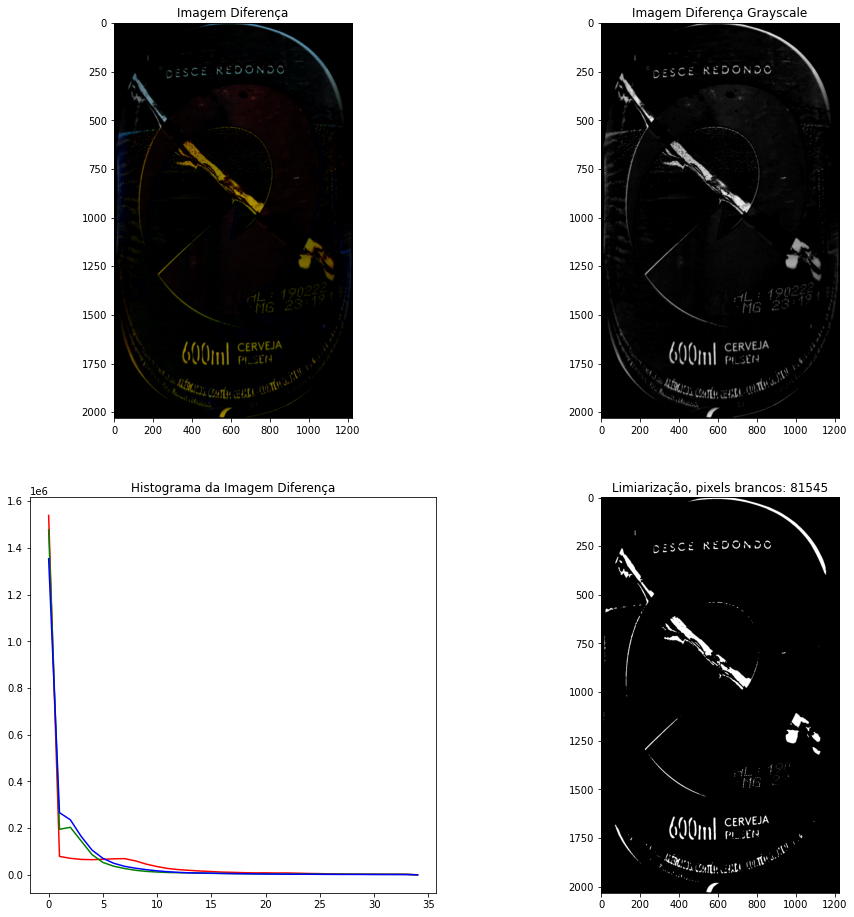

In [5]:
img_diff_gray = cv2.cvtColor(img_diff, cv2.COLOR_RGB2GRAY)
hist = []

fig, axs = plt.subplots(2, 2, figsize=(16, 16))
color = ('r', 'g', 'b')
for i, col in enumerate(color):
    hist.append(cv2.calcHist([img_diff], [i], None, [35], [0, 34]))
    axs[1, 0].plot(hist[i], color=col)

_, img_diff_t = cv2.threshold(img_diff_gray, 50, 1, cv2.THRESH_BINARY)
t_sum = np.sum(img_diff_t)

axs[0, 0].imshow(img_diff)
axs[0, 0].set_title("Imagem Diferença")
axs[0, 1].imshow(img_diff_gray, 'gray')
axs[0, 1].set_title("Imagem Diferença Grayscale")
axs[1, 1].imshow(img_diff_t, 'gray')

axs[1, 1].set_title(f'Limiarização, pixels brancos: {t_sum}')
axs[1, 0].set_title("Histograma da Imagem Diferença")
plt.show()

# Analise de Histograma Resultados

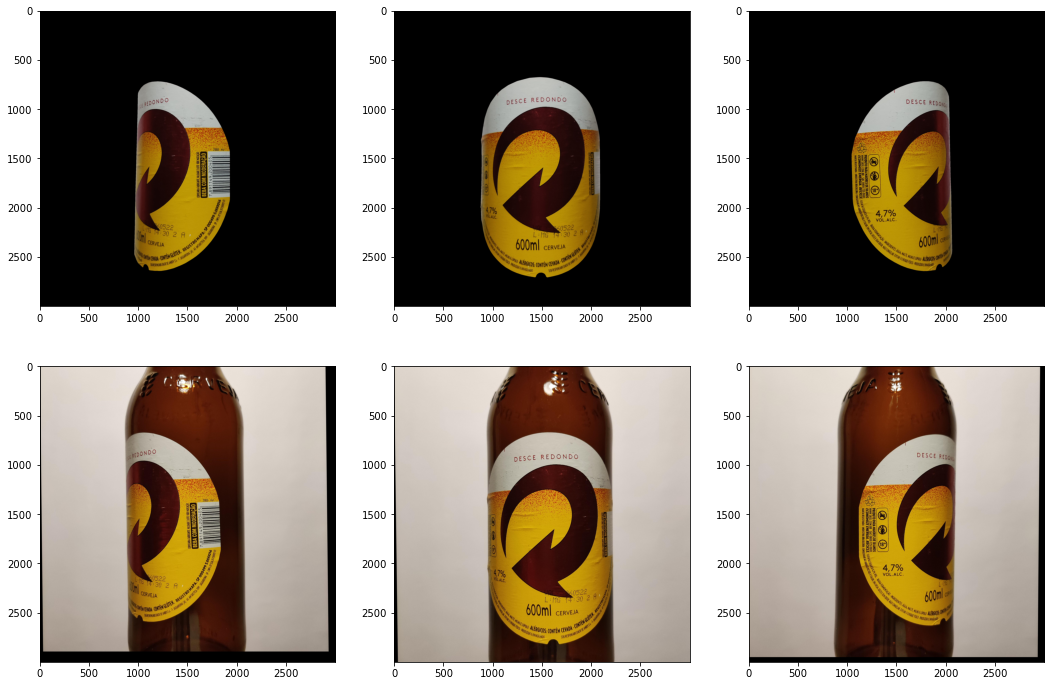

In [4]:
bc = BeerClassification(PATH, ids=['0', '1', '2'])

query_img_0 = bc.getImage(bc.imgs[0])
query_img_45L = bc.getImage(bc.imgs[1])
query_img_45R = bc.getImage(bc.imgs[2])

mask_0 = plt.imread(join(PATH, 'mask0.jpg'))
mask_45L = plt.imread(join(PATH, 'mask45L.jpg'))
mask_45R = plt.imread(join(PATH, 'mask45R.jpg'))

query_img_0_m = cv2.bitwise_and(query_img_0, mask_0)
query_img_45L_m = cv2.bitwise_and(query_img_45L, mask_45L)
query_img_45R_m = cv2.bitwise_and(query_img_45R, mask_45R)

train_img_0 = bc.getImage(bc.imgs[3])
train_img_45L = bc.getImage(bc.imgs[4])
train_img_45R = bc.getImage(bc.imgs[5])

fig, axs = plt.subplots(2, 3, figsize=(18, 12))
axs[0, 0].imshow(query_img_45L_m)
axs[0, 1].imshow(query_img_0_m)
axs[0, 2].imshow(query_img_45R_m)
axs[1, 0].imshow(train_img_45L)
axs[1, 1].imshow(train_img_0)
axs[1, 2].imshow(train_img_45R)
plt.show()

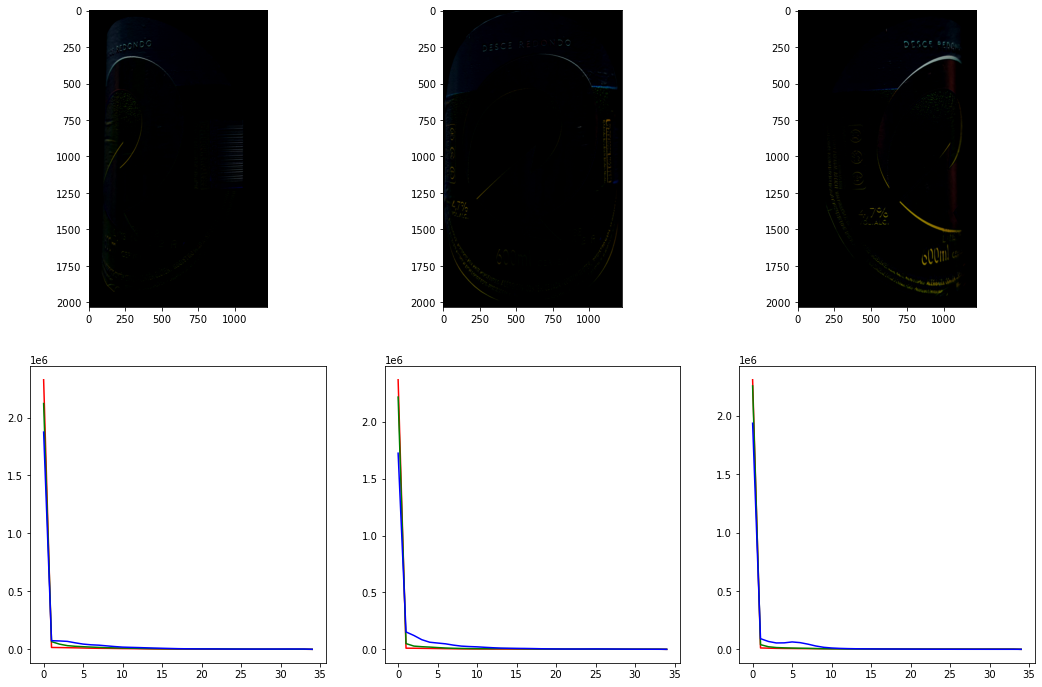

In [5]:
img_diff_0 = bc.processGetDiff(query_img_0_m, train_img_0)
img_diff_45L = bc.processGetDiff(query_img_45L_m, train_img_45L)
img_diff_45R = bc.processGetDiff(query_img_45R_m, train_img_45R)

fig, axs = plt.subplots(2, 3, figsize=(18, 12))
axs[0, 0].imshow(img_diff_45L)
axs[0, 1].imshow(img_diff_0)
axs[0, 2].imshow(img_diff_45R)

hist_size = [35]
ranges = [0, 34]
color = ('r', 'g', 'b')
hist_0 = []
hist_45L = []
hist_45R = []
for i, col in enumerate(color):
    hist_0.append(cv2.calcHist([img_diff_0], [i], None, hist_size, ranges))
    hist_45L.append(cv2.calcHist([img_diff_45L], [i], None, hist_size, ranges))
    hist_45R.append(cv2.calcHist([img_diff_45R], [i], None, hist_size, ranges))
    
    axs[1, 0].plot(hist_45L[i], color=col)
    axs[1, 1].plot(hist_0[i], color=col)
    axs[1, 2].plot(hist_45R[i], color=col)
plt.show()

In [6]:
results_0 = bc.compareHistogramAllImages(query_img_0_m, 0, hist_0, hist_size, ranges)
results_45L = bc.compareHistogramAllImages(query_img_45L_m, 0, hist_45L, hist_size, ranges)
results_45R = bc.compareHistogramAllImages(query_img_45R_m, 0, hist_45R, hist_size, ranges)

acc_0 = bc.predictAndScoreSVM(results_0)
acc_45L = bc.predictAndScoreSVM(results_45L)
acc_45R = bc.predictAndScoreSVM(results_45R)

print('Acc 45L:', acc_45L)
print('Acc 0:  ', acc_0)
print('Acc 45R:', acc_45R)

Acc 45L: 0.5079365079365079
Acc 0:   0.5079365079365079
Acc 45R: 0.4603174603174603


In [22]:
from sklearn.svm import OneClassSVM

def predictAndScoreSVM(X):
    true_labels = X[:, -1]
    X = X[:, :-1]
    # clf = OneClassSVM(gamma='auto').fit(X)
    clf = OneClassSVM().fit(X)
    pred = clf.predict(X)
    
    pred_outliers = pred == 1
    true_outliers = true_labels != 0
    pred_x_true = pred_outliers == true_outliers
    
    acc = np.sum(pred_x_true) / len(pred_x_true)
    return acc

acc_0 = predictAndScoreSVM(results_0)
acc_45L = predictAndScoreSVM(results_45L)
acc_45R = predictAndScoreSVM(results_45R)

print('Acc 45L:', acc_45L)
print('Acc 0:  ', acc_0)
print('Acc 45R:', acc_45R)

Acc 45L: 0.42857142857142855
Acc 0:   0.6349206349206349
Acc 45R: 0.3333333333333333


In [49]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import adjusted_rand_score

def predictAndScoreSVM(X):
    true_labels = X[:, -1]
    X = X[:, :-1]
    # clf = OneClassSVM(gamma='auto').fit(X)
    clf = OneClassSVM().fit(X)
    pred = clf.predict(X)
    
    pred_outliers = pred == 1
    true_outliers = true_labels != 0
    pred_x_true = pred_outliers == true_outliers

    acc = sum(pred_x_true) / len(pred_x_true)
    return acc

acc_0 = predictAndScoreSVM(results_0)
acc_45L = predictAndScoreSVM(results_45L)
acc_45R = predictAndScoreSVM(results_45R)

print('Acc 45L:', acc_45L)
print('Acc 0:  ', acc_0)
print('Acc 45R:', acc_45R)

Acc 45L: 0.42857142857142855
Acc 0:   0.6349206349206349
Acc 45R: 0.3333333333333333


In [50]:
X = results_0[:46, :]

from sklearn.svm import SVC
true_labels = X[:, -1]
X = X[:, :-1]
clf = OneClassSVM().fit(X)
pred = clf.predict(X)

pred_outliers = pred == 1
true_outliers = true_labels != 0
pred_x_true = pred_outliers == true_outliers

sum(pred_x_true) / len(pred_x_true)

0.5652173913043478

In [43]:
np.where(results_0[:, -1] == 2.)

(array([46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62],
       dtype=int64),)

# Limiarizacao

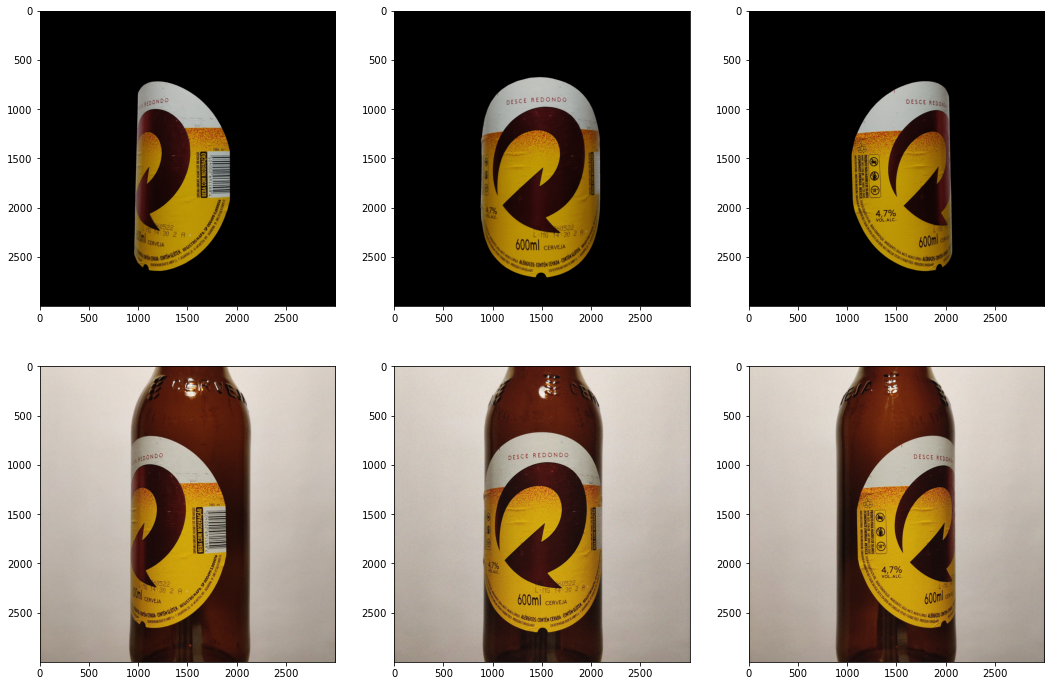

In [9]:
bc = BeerClassification(PATH, ids=['0', '1', '2'])

query_img_0 = bc.getImage(bc.imgs[0])
query_img_45L = bc.getImage(bc.imgs[1])
query_img_45R = bc.getImage(bc.imgs[2])

mask_0 = plt.imread(join(PATH, 'mask0.jpg'))
mask_45L = plt.imread(join(PATH, 'mask45L.jpg'))
mask_45R = plt.imread(join(PATH, 'mask45R.jpg'))

query_img_0_m = cv2.bitwise_and(query_img_0, mask_0)
query_img_45L_m = cv2.bitwise_and(query_img_45L, mask_45L)
query_img_45R_m = cv2.bitwise_and(query_img_45R, mask_45R)

train_img_0 = bc.getImage(bc.imgs[39])
train_img_45L = bc.getImage(bc.imgs[40])
train_img_45R = bc.getImage(bc.imgs[41])

fig, axs = plt.subplots(2, 3, figsize=(18, 12))
axs[0, 0].imshow(query_img_45L_m)
axs[0, 1].imshow(query_img_0_m)
axs[0, 2].imshow(query_img_45R_m)
axs[1, 0].imshow(train_img_45L)
axs[1, 1].imshow(train_img_0)
axs[1, 2].imshow(train_img_45R)
plt.show()

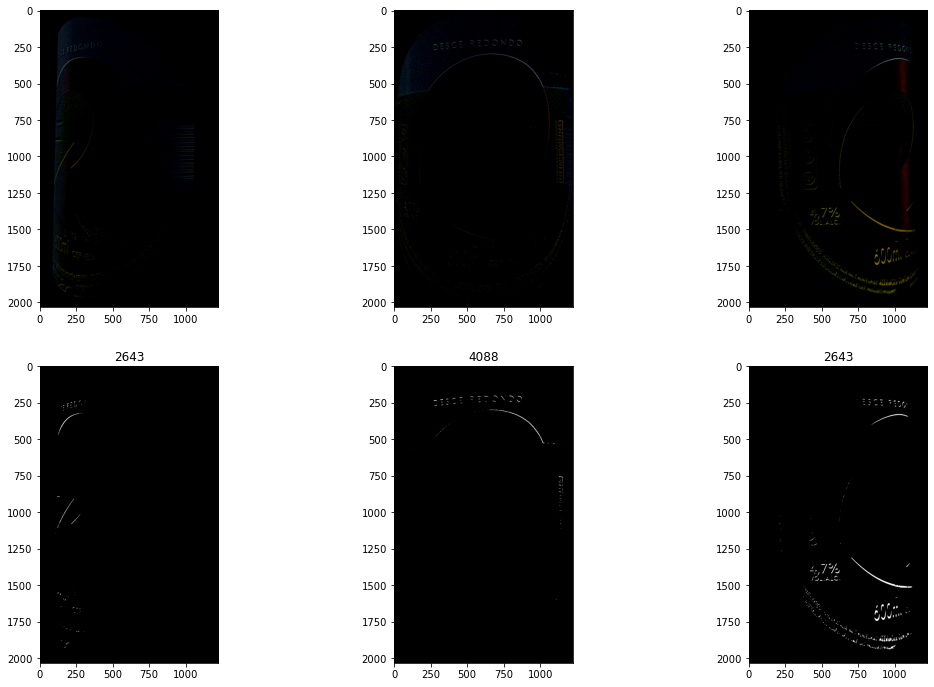

In [10]:
img_diff_0 = bc.processGetDiff(query_img_0_m, train_img_0)
img_diff_45L = bc.processGetDiff(query_img_45L_m, train_img_45L)
img_diff_45R = bc.processGetDiff(query_img_45R_m, train_img_45R)

img_diff_0_gray = cv2.cvtColor(img_diff_0, cv2.COLOR_RGB2GRAY)
img_diff_45L_gray = cv2.cvtColor(img_diff_45L, cv2.COLOR_RGB2GRAY)
img_diff_45R_gray = cv2.cvtColor(img_diff_45R, cv2.COLOR_RGB2GRAY)

threshold_value = 50
_, img_diff_0_t = cv2.threshold(img_diff_0_gray, threshold_value, 1, cv2.THRESH_BINARY)
_, img_diff_45L_t = cv2.threshold(img_diff_45L_gray, threshold_value, 1, cv2.THRESH_BINARY)
_, img_diff_45R_t = cv2.threshold(img_diff_45R_gray, threshold_value, 1, cv2.THRESH_BINARY)

sum_0 = np.sum(img_diff_0_t)
sum_45L = np.sum(img_diff_45L_t)
sum_45R = np.sum(img_diff_45R_t)

fig, axs = plt.subplots(2, 3, figsize=(18, 12))
axs[0, 0].imshow(img_diff_45L)
axs[0, 1].imshow(img_diff_0)
axs[0, 2].imshow(img_diff_45R)
axs[1, 0].imshow(img_diff_45L_t, 'gray')
axs[1, 1].imshow(img_diff_0_t, 'gray')
axs[1, 2].imshow(img_diff_45R_t, 'gray')
axs[1, 0].set_title(sum_45L)
axs[1, 1].set_title(sum_0)
axs[1, 2].set_title(sum_45L)
plt.show()

In [1]:
results_0 = bc.thresholdAllImages(query_img_0_m, 0)
results_45L = bc.thresholdAllImages(query_img_45L_m, 1)
results_45R = bc.thresholdAllImages(query_img_45R_m, 2)

acc_0, T_0 = bc.predictAndScoreThreshold(results_0, -1)
acc_45L, T_45L = bc.predictAndScoreThreshold(results_45L, -1)
acc_45R, T_45R = bc.predictAndScoreThreshold(results_45R, -1)

print('Acc 45L:', acc_45L, 'T:', T_45L)
print('Acc 0:  ', acc_0, 'T:', T_0)
print('Acc 45R:', acc_45R, 'T:', T_45R)

NameError: name 'bc' is not defined